# **Setting up the environment**

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

# **Data visualization**

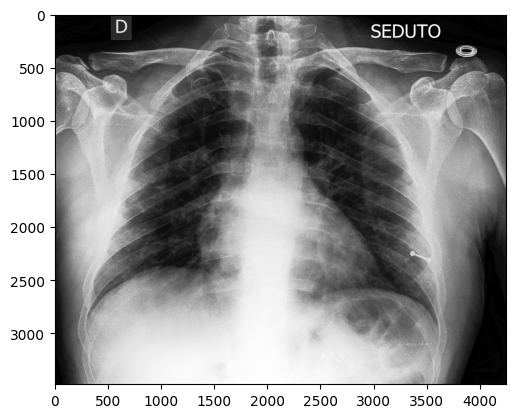

In [3]:
covid = plt.imread('/kaggle/input/covid19-image-dataset/Covid19-dataset/train/Covid/01.jpeg')
plt.imshow(covid)

In [4]:
covid.shape

(3480, 4248, 3)

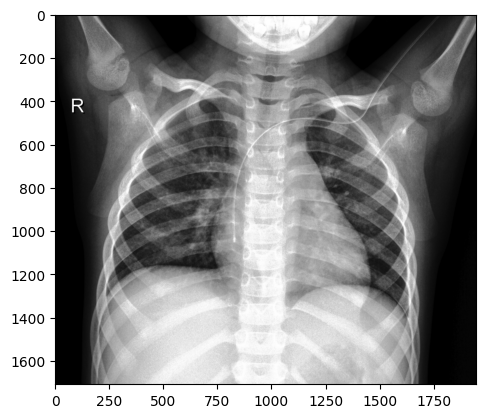

In [5]:
normal = plt.imread('/kaggle/input/covid19-image-dataset/Covid19-dataset/train/Normal/01.jpeg')
plt.imshow(normal)

In [6]:
normal.shape

(1708, 1944, 3)

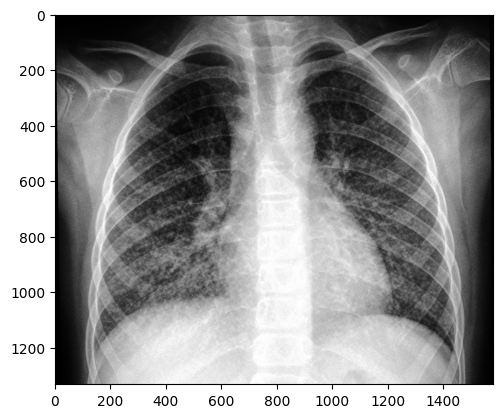

In [7]:
pneumonia = plt.imread('/kaggle/input/covid19-image-dataset/Covid19-dataset/train/Viral Pneumonia/01.jpeg')
plt.imshow(pneumonia)

In [8]:
pneumonia.shape

(1333, 1582, 3)

# **Dataset generation**

In [9]:
image_directory = "/kaggle/input/covid19-image-dataset/Covid19-dataset/train"

dataset = tf.keras.utils.image_dataset_from_directory(
    image_directory,
    labels="inferred",
    label_mode="categorical",
    image_size=(224,224),
    batch_size=32,
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="training"
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    image_directory,
    labels="inferred",
    label_mode="categorical",
    image_size=(224,224),
    batch_size=32,
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="validation"
)

Found 251 files belonging to 3 classes.
Using 201 files for training.
Found 251 files belonging to 3 classes.
Using 50 files for validation.


In [10]:
dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

In [11]:
dataset.class_names

['Covid', 'Normal', 'Viral Pneumonia']

# **CNN**

In [12]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()

from functools import partial

DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, padding="same",
                        activation="relu", kernel_initializer="he_normal")
model = tf.keras.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[224, 224, 3]),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=3, activation="softmax")
])

In [13]:
tf.random.set_seed(42)
model.compile(loss="categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])
history = model.fit(
    dataset,
    validation_data=validation_dataset,
    epochs=10
)

Epoch 1/10
7/7 [==============================] - 27s 912ms/step - loss: 1573.0386 - accuracy: 0.4179 - val_loss: 3.6436 - val_accuracy: 0.6600
Epoch 2/10
7/7 [==============================] - 3s 241ms/step - loss: 3.4594 - accuracy: 0.5124 - val_loss: 0.7239 - val_accuracy: 0.7400
Epoch 3/10
7/7 [==============================] - 3s 232ms/step - loss: 1.1337 - accuracy: 0.5174 - val_loss: 0.7347 - val_accuracy: 0.7000
Epoch 4/10
7/7 [==============================] - 3s 234ms/step - loss: 1.0602 - accuracy: 0.5970 - val_loss: 0.7252 - val_accuracy: 0.7400
Epoch 5/10
7/7 [==============================] - 3s 240ms/step - loss: 0.6775 - accuracy: 0.7214 - val_loss: 0.6146 - val_accuracy: 0.7400
Epoch 6/10
7/7 [==============================] - 3s 230ms/step - loss: 0.7133 - accuracy: 0.6567 - val_loss: 0.4802 - val_accuracy: 0.7600
Epoch 7/10
7/7 [==============================] - 3s 231ms/step - loss: 1.7816 - accuracy: 0.6766 - val_loss: 0.6306 - val_accuracy: 0.7400
Epoch 8/10
7/7 [

# **Error analysis**

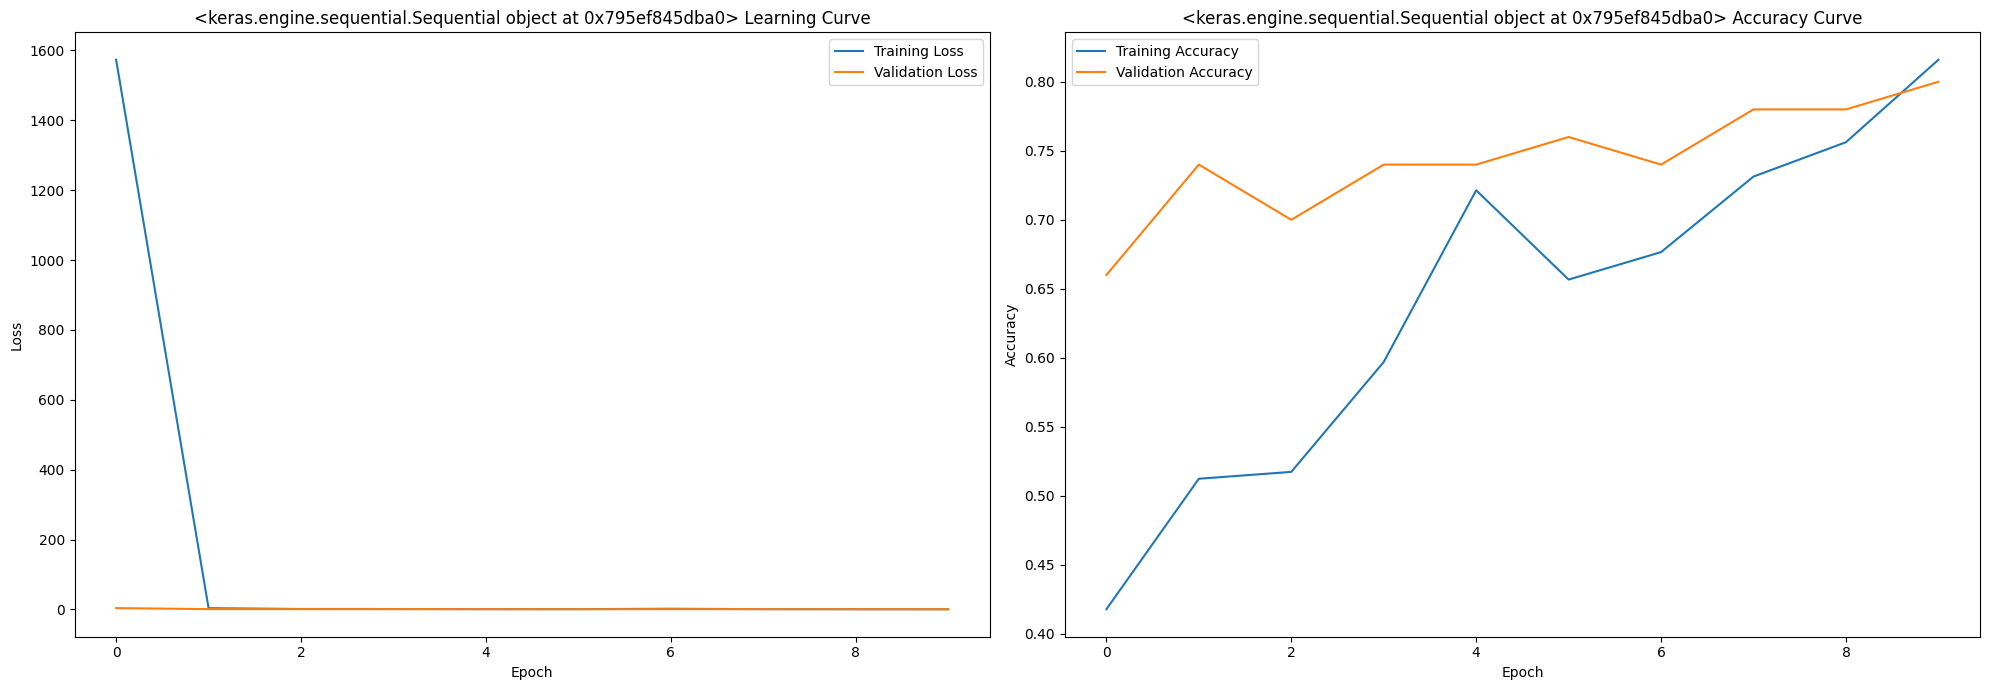

In [14]:
def plot_learning_curves(history, model_name, ax):
    ax.plot(history.history['loss'], label='Training Loss')
    ax.plot(history.history['val_loss'], label='Validation Loss')
    ax.set_title(f'{model_name} Learning Curve')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.legend()

def plot_accuracy_curves(history, model_name, ax):
    ax.plot(history.history['accuracy'], label='Training Accuracy')
    ax.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax.set_title(f'{model_name} Accuracy Curve')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')
    ax.legend()

fig, axs = plt.subplots(1, 2, figsize=(20, 7))  
plot_learning_curves(history, model, axs[0])
plot_accuracy_curves(history, model, axs[1])

plt.tight_layout()
plt.show()